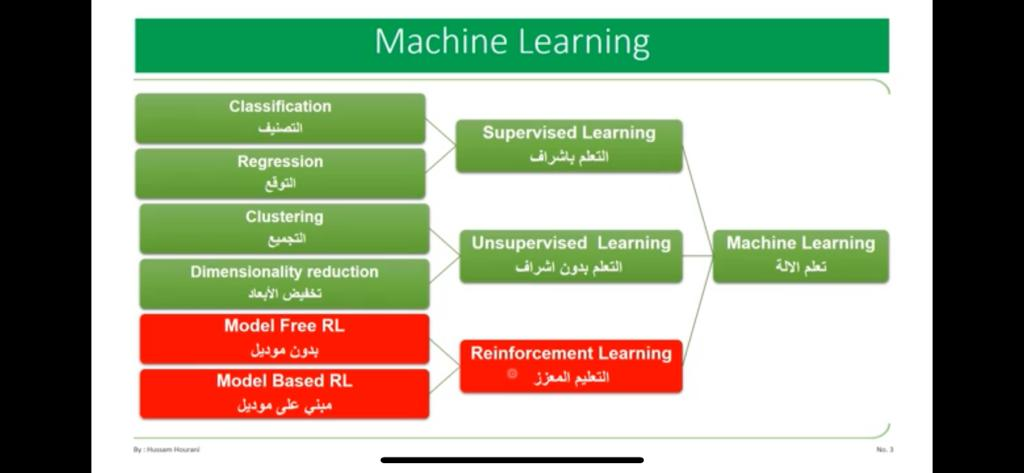

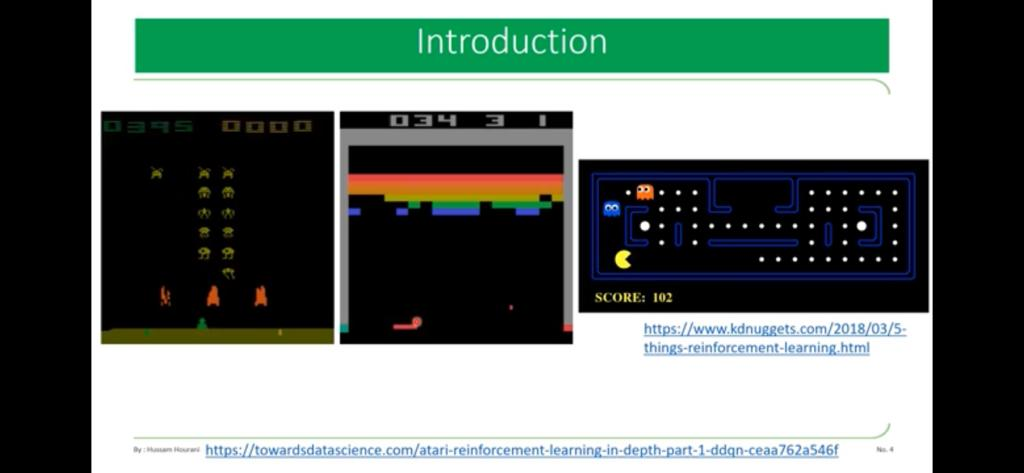

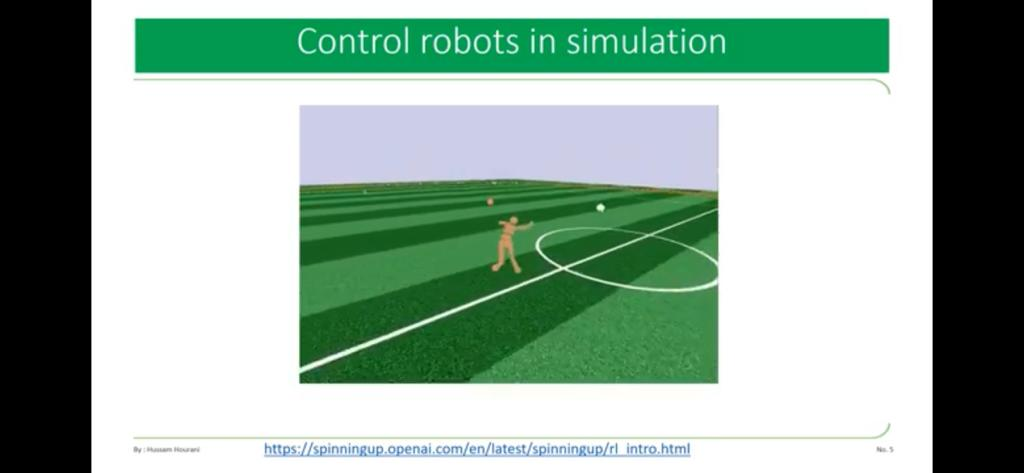

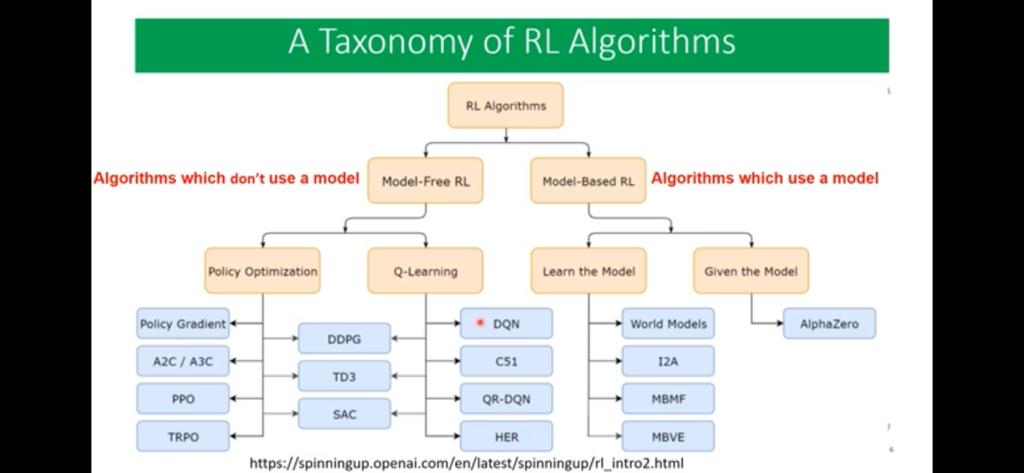

# Installing GYM

In [ ]:
pip install gym
pip install gym[atari]
pip install 'gym[all]'

# Reinforcement and GYM

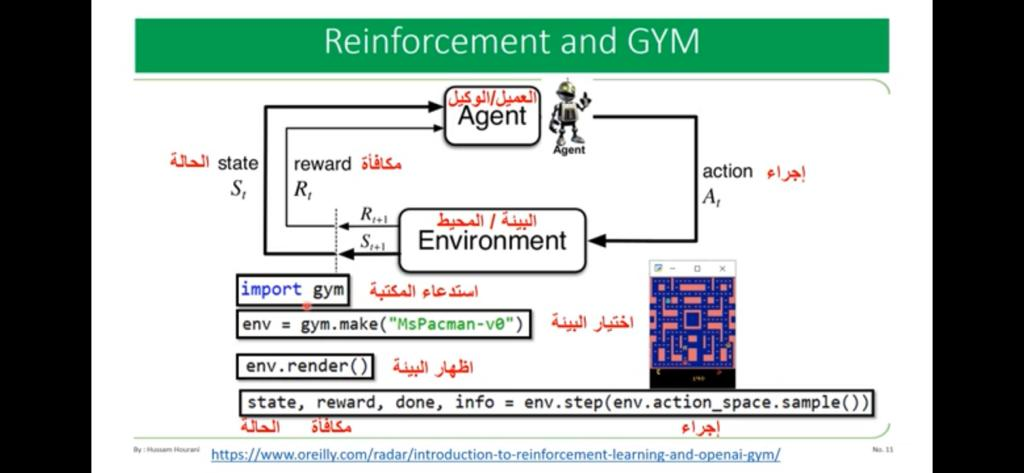

In [ ]:
import gym      # استدعاء المكتبة 
env = gym. make("MsPacman-v0")   # اختيار المكتبة
env.render()   #  اظهار البيئة
state, reward, done, info = env.step(env.action_space.sample ())  # اجراء و مكافأة و الحالة

# Environments List


In [ ]:
from gym import envs
print (envs.registry.all())

In [ ]:
from gym import envs
envids = [spec.id for spec in envs.registry.all()]
for envid in sorted(envids):
    print(envid)

# Simple Example

In [ ]:
!pip install gym[atari]

In [ ]:
import gym
env = gym.make ('SpaceInvaders-v0')
env. reset ()
env.render ()

In [ ]:
import gym
env = gym.make( 'SpaceInvaders-v0')
env.reset ()
for _ in range (1000):
    env.step(env.action_space.sample ())
    env. render ('human' )
env. close ()

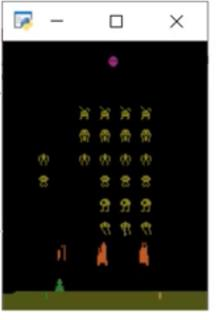

# Building CartPole

In [ ]:
import gym
env = gym.make('CartPole-v0')
env.reset ()
for _ in range (1000):
    env. render ()
    env.step(env.action_space.sample ())
env.close()

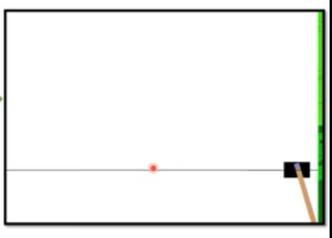

# Atari environment -Ms. Pacman

In [ ]:
import gym
env = gym. make ("MsPacman-v0")
state = env.reset ()
reward, info, done = None, None, None
while done != True:
    state, reward, done, info = env.step(en.action_space.sample ())
    env. render ()
env. close ()

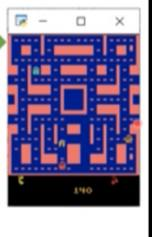

# Taxi Environment
Actions:                         
0: move south                      
1: move north                        
2: move east                      
3: move west                        
4: pickup passenger                           
5: dropoff passenger


This task was introduced in [Dietterich2000] to illustrate some issues in hierarchical reinforcement learning. 
There are 4 locations (labeled by different letters) and your job is to pick up the passenger at one location and 
drop him off in another. You receive +20 points for a successful dropoff, and lose 1 point for every timestep it takes.
There is also a 10 point penalty for illegal pick-up and drop-off actions.

In [ ]:
import gym
env = gym.make("Taxi-v2").env
env. reset ()
env. render ()

In [ ]:
import gym
env = gym.make ("Taxi-v2").env
env. reset ()
env. render ()
print("Action Space {}".format (env.action_space))
print("State Space {}".format (env.observation_space))

In [ ]:
import gym
env = gym.make("Taxi-v2").env
env.reset ()
env.render ()
print("action_spac : " , env. action_space.n)
env.s = 114
env. render ()
state, reward, done, info = env.step (1)
print(state, reward, done, info)
env. render ()

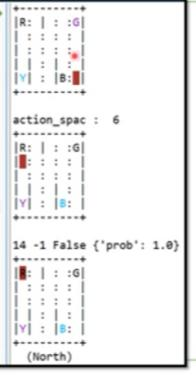

# Solving Taxi - Randomly


In [ ]:
import gym
env = gym. make("Taxi-v2").env
env. reset ()
env. render ()
state = env.reset ()
counter = 0
reward = None
while reward != 20:
    state, reward, done, info = env.step(env.action_space. sample ())
    counter += 1
    env. render ()
print (counter)

# Reinforcement Q-Learning

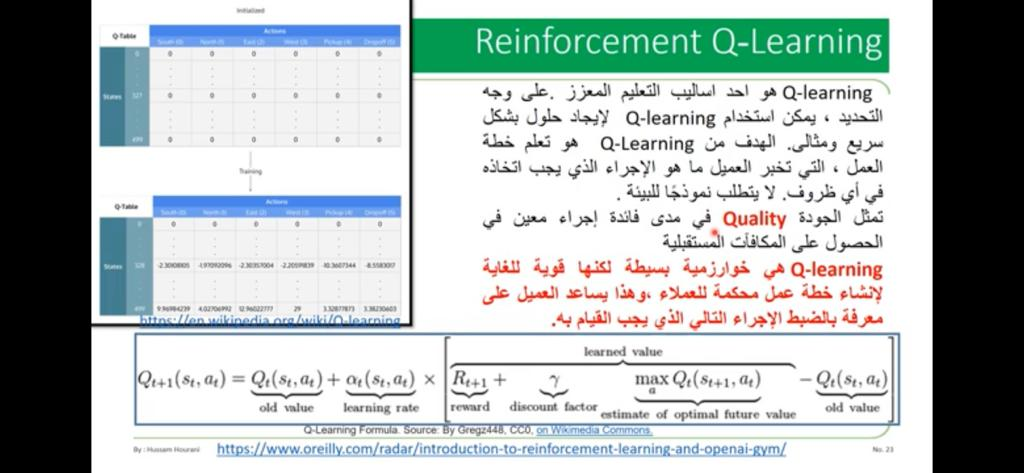

# Solving Taxi - Reinforcement Q-Learning

In [ ]:
import gym
import numpy as np
# To manage this Q table, we will use a NumPy array. The size of this table will be the number of states (500) by the number of possible actions (6).
env = gym.make("Taxi-v2").env
env. reset ()
env.render ()

#choosing an action with the highest Q value for the current state using argmax, Argmax will return the index/action with the highest value for that state

Q = np.zeros([env.observation_space.n, env.action_space.n])
G = 0
alpha = 0.618
for episode in range(1,1001):
    done = False
    G, reward = 0,0
    state = env.reset ()
    # The agent then takes action and we store the future state as state2 (St+1)
    while done != True:
        action = np.argmax(Q[state])#1
        state2, reward, done, info = env.step (action) #2
        [state, action] += alpha * (reward + np.max(Q[state2]) - Q[state, action]) #3
        G += reward
        state = state2
        env. render ()
        # update the state-action pair (St, At) for Q using the reward, and the max Q value for state2 (St+1)
        if episode % 50 ==0:
            print('Episode {} Total Reward: {}',format (episode,G)

# Frozen Lake- RL Q-Learning
SFFF(S: starting point, safe)                    
FHFH(F: frozen surface, safe)                   
FFFH(H: hole, fall to your doom)                 
HFFG(G: goal, where the frisbee is located)

In [ ]:
import gym
import numpy as np
env = gym.make ('FrozenLake-v0')
Q = np.zeros ([env.observation_space.n, env.action_space.n])
# Set learning parameters
lr=.8
y = .95
num_episodes = 2000
#create lists to contain total rewards and steps per episode
rList = []
for i in range (num_episodes) :
    s = env.reset
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        J+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s, :] + np.random. randn (1, env.action_space.n)* (1./(i+1)))
        #Get new state and reward from environment
        s1, r, d,_ = env.step (a)
        #Update 0-Table with new knowledge
        Q[s,a] = Q[s,a] + lr* (r + y*np.max(Q[s1, :]) - Q[s, a])
        rAll+=r
        s = s1
        if d == True:
            break
    #iList.append(j)
    rList.append(rAll)
    env.render ()
print ("Score over time: " + str(sum(rList)/num_episodes))
print ("Final Q-Table Values")
print (Q)

# Deep Q-Learning in using Keras & OpenAl Gym


In [ ]:
!pip install keras-rl


In [ ]:
import numpy as np
import gym
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from r1.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from r1.memory import SequentialMemory
ENV NAME = 'CartPole-v0'
#Get rhe envarthmen- and extract the number of actions available in the Cartpole prol 
env = gym.make (ENV_NAME)
np.random.seed (123)
env.seed (123)
b_actions = env.action_ space.n
#simple single hidden layer neural network model
model = Sequential()
model. add(Flatten(input_shape=(1,) + env.observation_space.shape))
model. add(Dense (16))
model. add(Activation ('relu'))
model.add (Dense (nb_actions))
model.add(Activation ('linear'))
print( model. summary ())
policy = EpsGreedyQPolicy()
memory = SequentialMemory (limit=50000, window_length=1) #store the result of actions
dqn = DQNAgent (model=model, b_actions=b_actions, memory=memory, b_steps_warmup=10,target_model_update=le-2, policy=policy)
dqn. compile (Adam(lr=le-3), metrics= ['mae' ])
# Okay, now it's time to learn something! We visualize the training here for show, but
dqn.fit (env, nb_steps=5000, visualize=True, verbose=2)
dqn. test (env, b_episodes=5, visualize=True) #Test our reinforcement learning model


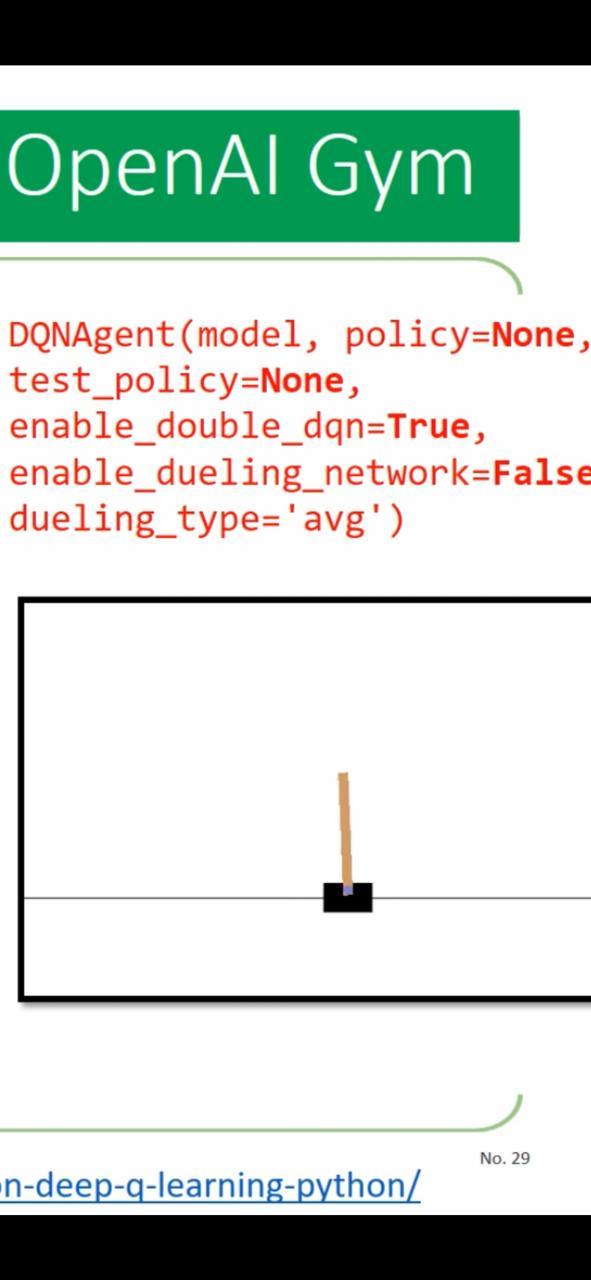

# Refernces: 

https://www.kdnuggets.com/2018/03/5-things-reinforcement-learning.html

https://towardsdatascience.com/atari-reinforcement-learning-in-depth-part-1-ddqn-ceaa762a546f

https://spinningup.openai.com/en/latest/spinningup/rlintro.html

https://spinningup.openai.com/en/latest/spinningup/rl_intro2.html

https://gym.openai.com/

https://www.oreilly.com/radar/introduction-to-reinforcement-learning-and-openai-gym/

https://stackoverflow.com/questions/42605769/openai-gym-atari-on-windows

https://gym.openai.com/docs/

https://www.oreilly.com/radar/introduction-to-reinforcement-learning-and-openai-gym/

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

